In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
import utils.pluto_utils as pluto
import utils.reynolds as rey
import utils.probabilities as probs
from utils.visualise import animate_vars

# Load data

In [3]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/HD/3D turbulent field//"
save_dir = os.path.join(output_dir,'visualisation/')

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [4]:
f_names = pluto.get_HDF5names(output_dir)
X, Y, Z = pluto.load_HDF5data(os.path.join(output_dir,f_names[0]), 'X', 'Y', 'Z')
rho = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'rho')[0] for f_name in f_names])
# prs = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'prs')[0] for f_name in f_names])
vx1 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx1')[0] for f_name in f_names])
vx2 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx2')[0] for f_name in f_names])
vx3 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx3')[0] for f_name in f_names])
times = pluto.get_times(output_dir)

In [5]:
v = [vx1, vx2, vx3]

In [6]:
def get_pdf(vals,times=None,nbins=10):

    # TODO:
    
    try:
        if not times:
            times = np.arange(len(vals))
    except:
        pass

    bins = np.linspace(vals.min(),vals.max(),nbins+1)

    pdf = np.zeros((nbins,*vals[0].shape))
    # print

    # print(len(bins))
    # print(vals.min(),vals.max())
    
    for i in range(nbins):
        # print(i,bins[i], bins[i+1])
        # print()
        for j,val in enumerate(vals[:-1]):
            # if i==0:
            #     print(j, ((bins[i]<=val)*(val<bins[i+1])))
                       
            where = np.where(((bins[i]<=val)*(val<bins[i+1])))
            # if i==0:
            #     print(where)
            pdf[i][where] += times[j+1]-times[j]
    
    pdf /= times[-1]-times[0]

    return bins, pdf

In [7]:
bins, B = get_pdf(vx1,times,10)

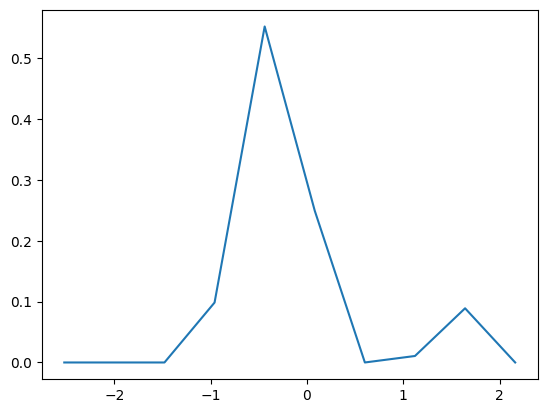

In [8]:
plt.plot(bins[:-1], B[:,16,16])

plt.show()

# bins, 

# Reynold's Decomposition

In [6]:
if X.ndim==3:
    dxdydz = ((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1],(Z.max()-Z.min())/Z.shape[2])
    ndim = 3
else:
    dxdydz =((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1])
    ndim = 2

In [7]:
t0 = .1

In [10]:
ux1 = rey.get_fluctuations(vx1,times,t0)
ux2 = rey.get_fluctuations(vx2,times,t0)
ux3 = rey.get_fluctuations(vx3,times,t0)

In [14]:
speed = np.array([(_ux1**2+_ux2**2+_ux3**2)**.5 for _ux1,_ux2,_ux3 in zip(ux1,ux2,ux3)])

# Calculate Compton-$y$ Parameter

In [16]:
kB = 1.
m_e = 1.
c = 1.
sigmaT = 1.

In [17]:
prs = m_e/3 * np.array([_speed**2*_rho for _speed,_rho in zip(speed,rho)])

In [12]:
times

array([0.        , 0.00983471, 0.01819434, 0.02991268, 0.03790185,
       0.04940355, 0.05926036, 0.06968305, 0.07875005, 0.08819892,
       0.09847701, 0.1084604 , 0.1174984 , 0.1273482 , 0.1373485 ,
       0.1472656 , 0.1571277 , 0.1676287 , 0.1786669 , 0.1863333 ,
       0.1979852 , 0.2096455 , 0.2175073 , 0.2294515 , 0.2375411 ,
       0.2497533 , 0.2580297 , 0.266301  , 0.2787413 , 0.287039  ,
       0.2994911 , 0.3077416 , 0.3160813 , 0.3284813 , 0.3365729 ,
       0.3486902 , 0.3566259 , 0.3686415 , 0.3767109 , 0.3887451 ,
       0.3966954 , 0.4088138 , 0.4168903 , 0.4289459 , 0.4370143 ,
       0.4491031 , 0.4571404 , 0.469195  , 0.4772206 , 0.4894815 ,
       0.4976713 , 0.5059289 , 0.5183706 , 0.5266329 , 0.5390369 ,
       0.5472734 , 0.5596908 , 0.5680626 , 0.5765614 , 0.5894293 ,
       0.5982102 , 0.6071091 , 0.6160184 , 0.6295057 , 0.6385062 ,
       0.6475543 , 0.6566715 , 0.6657965 , 0.6795261 , 0.6887223 ,
       0.6979261 , 0.7070589 , 0.7162864 , 0.7256041 , 0.73965

ValueError: cannot reshape array of size 262144 into shape (1,64)

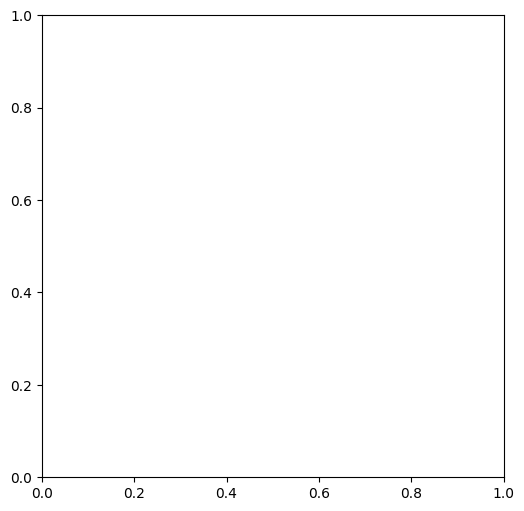

In [9]:
corr = rey.get_correlation(ux1,ux2,times)

vmax = np.abs(corr).max()

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,corr,cmap='bwr',
                  vmin=-vmax,vmax=vmax
                  )

fig.colorbar(im,shrink=.8)
plt.show()

In [18]:
strain_t = np.array([rey.get_strain(vx1[timeslice],vx2[timeslice],dxdydz=dxdydz) for timeslice in range(100)])

In [23]:
vars_t = np.array([strain[0][0] for strain in strain_t])
vmax = np.abs(vars_t).max()

In [24]:
vmax

np.float64(580.4593641240059)

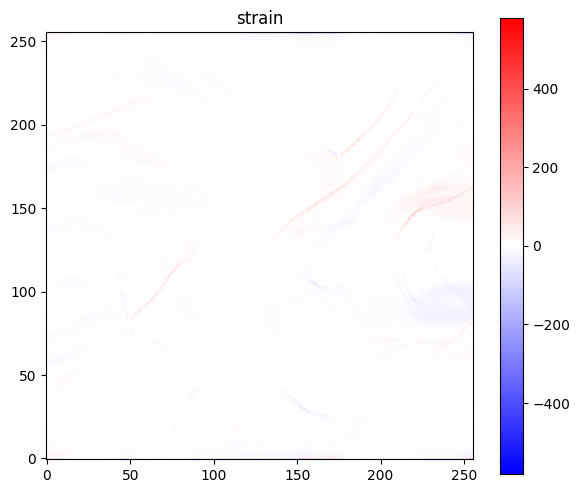

In [25]:
animate_vars(vars_t,vmin=-vmax,vmax=vmax,title='strain',save_dir=os.path.join(save_dir,'strain.mp4'),cmap='bwr')

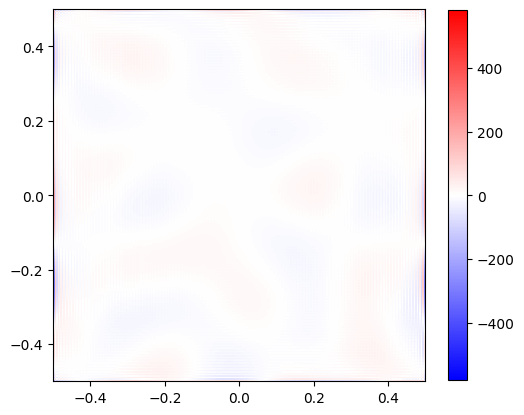

In [28]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,strain_t[0][0][1],
                   cmap='bwr',vmin=-vmax,vmax=vmax,
                  )

fig.colorbar(im,shrink=.8)
plt.show()

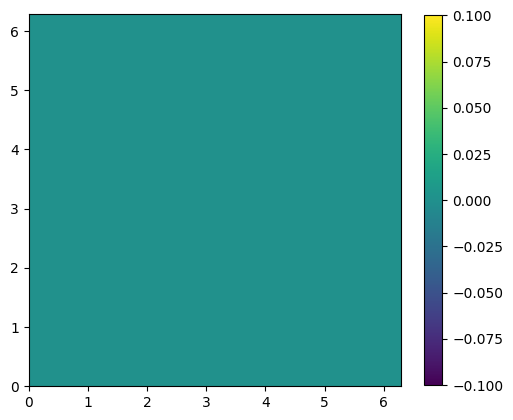

In [145]:
# timeslice = 0

# stress_t = [rey.get_stress(prs[timeslice],0,vx1[timeslice],vx2[timeslice],dxdydz=dxdydz) for timeslice in range(100)]

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,stress_t[90][0][1],
                   # cmap='bwr',vmin=-vmax,vmax=vmax,
                  )

fig.colorbar(im,shrink=.8)
plt.show()

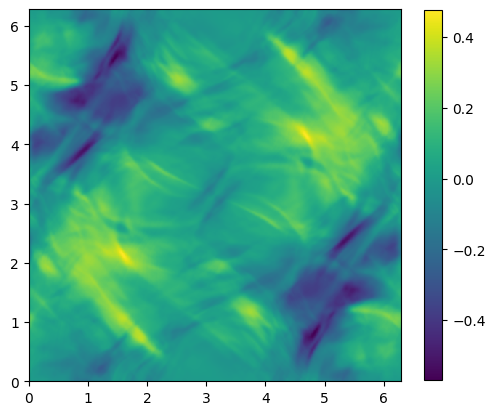

In [140]:
# stressR = [[0 for _i in range(ndim)] for _j in range(ndim)]

# for i in range(ndim):
#     for j in range(ndim):
#         stressR[i][j] = rey.get_timeaverage(-rho*ux1*ux2,times)

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,stressR[0][1],
                   # cmap='bwr',vmin=-vmax,vmax=vmax,
                  )

fig.colorbar(im,shrink=.8)
plt.show()